![Banner](img/banner.png)

# **Actividad N°1:** Distancias y algoritmo KNN

***Matemáticas para Machine Learning.***

Semana 1 - Lección 1 : Matrices y Vectores. Operaciones y Dependencia Lineal

**Profesor:** *Fernando Enrique Lozano Martinez* - **Autor Notebook:** *Nicolas Orlando López Cuéllar*


# Introducción <a class="anchor" id="introduccion"></a>

## Descripción 

El presente *jupyter notebook* contine todo el material para el desarrollo de la Tarea 1 de la Semana 1 del curso ***Matemáticas para Machine Learning***. En este se realizarán ejercicios de manipulación de vectores para familiarizarce al entorno de Jupyter Notebook, así como también se realizara una implementación básica del algoritmo KNN.

**Objetivos de Aprendizaje:**

*   Cuantificar tamaños y distancias en un espacio vectorial.
*   Familiarizarce con el lenguaje de programación de python. Escribir funciones en este lenguaje para resolver problemas.
*   Comprender la implementación del algoritmo KNN y como aplicarlo en una base de datos para clasificación.

## Metodologia

Para la realización de los talleres se hará uso de  **cuadernos Jupyter**, los cuales son una aplicación web de fuente abierta en la cual se pueden crear documentos que contengan código, ecuaciones y visualizaciones.

Se utilizan 2 ambientes principales: Las celdas tipo Markdown, en donde se pueden escribir ecuaciones utilizando código LateX o HTML, y las celdas tipo código en donde se puede escribir código utilizando Python. Para desarrollar el taller usted deberá editar las celdas de código dispuestas para esto. Estas estarán marcadas con el siguiente comentario:

```python
# =====================================================
# COMPLETAR ===========================================
# 

# =====================================================
```

Edite o complete el códgio dentro de estas lineas de comentarios. Dentro de estos comentarios encontrará indicaciónes de lo que debe hacer, así como algunas de las variables que debe utilizar o calcular (puede que estas tengan ya una estructura para llenar o no, revise y complete la asignación).

En este notebook, cada punto tendrá una sección para probar libremente el trabajo realizado explorando sus resultados, asi como también una sección de pruebas avanzadas las cuales serán autocalificadas. Las secciones de código utilizadas para señalar estos espacios son respectivamente


```python
# PROBAR ==========================================================
funcion_trabajada()
```
y 

```python
### ==========================================================================
### PRUEBAS AVANZADAS ========================================================
pruebas_avanzadas(funcion_trabajada)
```

# Teoria <a class="anchor" id="teoria"></a>

## Norma euclidiana 

Recuerde que para $\mathbf{v} = (v_1 , \ldots , v_n) \in \mathbb{R}^n$ podemos definir la norma euclidiana, que coincide con la noción que tenemos de distancia, como:

$$ \| \mathbf{v} \| = \sqrt{ v_1^2 + \ldots + v_n^2 } $$  

Este es un caso particular de un conjunto de normas llamadas $p$-normas. las cuales se definen para $p> 1$ de tal manera que:

$$ \| \mathbf{v} \|_p = \left( |v_1|^p + \ldots + |v_n|^p \right)^{1/p} $$  

La norma euclidiana es entonces el caso particular de $p = 2$

## Algoritmo KNN

EL algoritmo de vecinos mas cercanos, o KNN por sus siglas en ingles (K-Nearest Neighbors), es un algoritmo de aprendizaje supervisado usado en problemas de clasificación o de regresión. Es un algoritmo no parámetrico, lo que quiere decir que no realiza suposiciones acerca de la estructura de datos; y se reconoce como un "algoritmo perezoso", puesto que realiza el entrenamiento durante su fase de prueba. En este laboratorio implementaremos este algoritmo sobre una base de datos para clasificar datos en etiquetas.

Suponga que se tienen $m$ datos y $p$ categorias distintas en las que podemos clasificar estos datos, de tal manera que cada dato tendrá asociada una única categoria. También suponga que a cada dato se le pueden medir un total de $n$ propiedades o características númericas. Esto lo podemos escribir matemáticamente de la siguiente manera:


Sea $\mathcal{V} = \big\{ \mathbf{v}_1 , \mathbf{v}_2 , \> \ldots \> , \mathbf{v}_m \> \big| \> \mathbf{v}_i \in \mathbb{R}^n \big\}$ Una familia de $m$ vectores en $\mathbb{R}^n$. Y Sea $\mathcal{C} = \big\{ c_1 , \> \ldots \> , c_p \> \big| \> c_i : \textrm{Etiqueta}    \big\}$ un conjunto de $p$ etiquetas distintas y sea $cl : \mathcal{V} ⟶ \mathcal{C}$ una función envia cada vector $\mathbf{v}_i$ a su etiqueta respectiva. Entonces podemos crear la siguiente tabla

$$ \begin{array}{c|c|c} 
\textrm{No Dato} & \textrm{Descriptores} & \textrm{Etiqueta} \\
1 & \mathbf{v_1} & cl(\mathbf{v}_1) \\
2 & \mathbf{v_2} & cl(\mathbf{v}_2) \\
\vdots & \vdots & \vdots \\
m & \mathbf{v_m} & cl(\mathbf{v}_m) \\
\end{array} $$

$$ \mathbf{v}_i \in \mathcal{V} \qquad cl(\mathbf{v}_i) \in \mathcal{C}  $$

El algoritmo $KNN$ utiliza la información de la base de datos anterior para clasificar o etiquetar nuevos datos (datos sin etiqueta) a partir de sus descriptores. También utiliza el parámetro de ajuste $k$, el cual indica el número de elementos a ser tenidos en cuenta para la clasificación.

Suponga que llega un nuevo dato sin etiqueta pero con descriptores $\mathbf{u} = (u_1 , \> \ldots \> , u_n) \in \mathbb{R}^n$. Entonces KNN lo clasifica encontrando los $k$ vectores $\mathbf{v_i}$ mas cercanos a $\mathbf{u}$ y tomando la moda de las etiquetas de estos $k$ datos como la etiqueta predicha. En caso de que dos o mas etiquetas tengan la misma cantidad de apariciones entre los $k$ datos seleccionados, se puede seleccionar cualquiera de estas aleatoriamente.

# Problemas

A continuación se presentan una serie de problemas que nos llevarán a construir un algoritmo de KNN y a implementarlo en un grupo de datos. Primero, importamos las librerias necesarias para el laboratorio.

In [1]:
# Librerias Básicas
import numpy as np      
import pandas as pd

# Dibujar
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors

# Visualización
from IPython.display import display, HTML
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

In [2]:
# UTILIDADES =================================
# Correr una única vez por sesión ============
from maiautils import MaiaUtils
ipython = get_ipython()
mutils = MaiaUtils(ipython) 
# ============================================

In [3]:
# Cambiar configuración de informe de errores
mutils.toggle_traceback()

In [4]:
ipython

## Norma Euclidiana 

Escriba una función en Python que reciba 1 vector $\mathbf{v}$ como parámetro. de tal manera que retorne la norma euclidiana de este vector.

In [5]:
def norm(v) -> float:
    """
    Encuentra norma euclidiana de un vector
    ___________________________________
    Entrada:
    v: [1D-array] Vector
    ___________________________________
    Salida:
    nrm: [float]  Norma del vector
    """

    # =====================================================
    # COMPLETAR ===========================================
    v = np.array(v)
    nrm = np.linalg.norm(v)
    # AYUDA:
    # Estructura de Salida
    #nrm = 0
    # =====================================================

    return nrm

In [6]:
""" 
Para obtener información de una función en Python utilizamos la función help()
"""

help(norm)

Help on function norm in module __main__:

norm(v) -> float
    Encuentra norma euclidiana de un vector
    ___________________________________
    Entrada:
    v: [1D-array] Vector
    ___________________________________
    Salida:
    nrm: [float]  Norma del vector



### Probar <a class="anchor" id="normaProbar"></a>

In [7]:
# PROBAR ==========================================================
v = [3, 2, 1]
print(norm(v))

3.7416573867739413


### Test

In [8]:
### ==========================================================================
### PRUEBAS BÁSICAS ==========================================================

assert norm([2,2]) == 8**(1/2), f'Vector: [2,2] \nNorma esperada = {8**(1/2)}'
assert norm([3,2,1]) == (9+4+1)**(1/2), f'Vector: [3,2,1] \nNorma esperada = {(9+4+1)**(1/2)}'
assert norm([5,5,5,5,5]) == (5*(5**2))**(1/2), f'Vector: [5,5,5,5,5]\nNorma esperada = {(5*(5**2))**(1/2)}'

In [9]:
### ==========================================================================
### PRUEBAS AVANZADAS ========================================================

mutils.correr_prueba_norm(norm)

__________________________________
Verificando errores...




Sin Errores
__________________________________


In [12]:
import numpy as np

#def distancia(norma, a, b):
#    # Calcula la distancia entre dos vectores 'a' y 'b' utilizando la norma dada
#    return norma(a - b)

def k_mas_cercanos(V, x, norma, k):
    # Calcula la distancia entre el vector objetivo 'x' y cada vector en 'V'
    #distancias = [distancia(norma, x, v) for v in V]
    distancias = [norma(x - v) for v in V]
    
    # Enumera las distancias y vectores correspondientes, luego ordénalos por distancia
    distancias_y_vectores = list(enumerate(V, 0))
    distancias_y_vectores.sort(key=lambda d: distancias[d[0]])
    
    # Devuelve los 'k' vectores más cercanos
    k_cercanos = [v for _, v in distancias_y_vectores[:k]]
    
    return k_cercanos

# Ejemplo de uso
V = [np.array([1, 2]), np.array([2, 3]), np.array([4, 5]), np.array([6, 7])]
x = np.array([3, 4])
k = 2
resultado = k_mas_cercanos(V, x, np.linalg.norm, k)
print("Los", k, "vectores más cercanos a x son:")
print(resultado)
#for vector in resultado:
#    print(vector)


Los 2 vectores más cercanos a x son:
[array([2, 3]), array([4, 5])]


## Elementos mas cercanos

Suponga que tiene una familia de vectores $\mathcal{V} = \{ \mathbf{v}_1, \ldots , \mathbf{v}_m \}$  tal que $\mathbf{v}_i \in \mathbb{R}^n$.  Escriba una función en Python que reciba como parámetros la familia de vectores $\mathcal{V}$, una función de norma $\| \cdot \|: \mathbb{R}^n \longrightarrow \mathbb{R}_+ $, un parámetro $k$ y un vector objetivo $\mathbf{x}$. Esta función retorna los $k$ elementos de $\mathcal{V}$ mas cercanos a $\mathbf{x}$ bajo la norma introducida.

In [44]:
def k_mas_cercanos(x, V, k =1, norm=norm):
    """
    Encuentra vecinos cercanos
    ___________________________________
    Entrada:
    x: [1D-array] Vector central
    V: [2D-array] Familia de vectores 
    k: [int] # de vectores cercanos
    norm: [function] función de norma para utilizar
    ___________________________________
    Salida:
    cercanos: [2D-array] Lista de k vectores.
    """
    # =====================================================
    # COMPLETAR ===========================================
    # AYUDA:
    # Distancia de x con el primer elemento de V
    #diff0 = np.array(x) - np.array(V[v])
    #dist0 = norm(diff0)
    
    distancias = [norm(x - v) for v in V]
    # Enumera las distancias y vectores correspondientes, luego ordénalos por distancia
    distancias_y_vectores = list(enumerate(V, 0))
    distancias_y_vectores.sort(key=lambda d: distancias[d[0]])
    # Devuelve los 'k' vectores más cercanos
    cercanos = [v for _, v in distancias_y_vectores[:k]]
    
    # Estructura de salida
    #cercanos = [[0]*len(x)]*k
    # =====================================================

    return cercanos

### Generar Datos 

A continuación se presenta una función que genera datos aleatorios para poder probar nuestro algoritmo

In [45]:
# GENERAR DATOS ==================================================
def generar_datos(n=10, dim=2, nlog=3, seed=None):
    """ 
    Genera datos aleatorios con coordenadas enteras
    ___________________________________
    Entrada:
    n:    [int] número de datos
    dim:  [int] dimensión de datos
    nlog: [int] vectores en [0, ,10^nlog]]
    seed: [int] semilla de alleatoriedad
    ___________________________________
    Salida:
    V: [2D-array] n datos de dimensión dim 
    x: [1D-array] 1 dato de dimensión dim
    """
    # Inicializa aleatoriedad
    if seed is not None: np.random.seed(seed)

    # Familia de vectores
    V = np.around(np.random.rand(n, dim), nlog)*10**(nlog)
    # Vector aparte
    x = np.around(np.random.rand(1, dim), nlog)[0]*10**(nlog)

    # Formato
    V, x = V.astype(int), x.astype(int)
    return V, x

### Probar

A continuacióon se presenta un ejemplo con $100$ datos aleatorios con números entre $0$ y $10^3$ luego se calculan los 5 elementos mas cercanos a otro vector aleatorio $\mathbf{x}$ y se observa visualmente.

In [47]:
# PROBAR ==========================================================
V, x =  generar_datos(n=100, dim=2, nlog=3, seed=None)

# Encontrar cercanos
cercanos = k_mas_cercanos(x, V, k=5,norm=norm)
print(cercanos)

[array([901,  16]), array([892,  88]), array([837, 128]), array([957,  60]), array([682, 104])]


### Visualizar

Para visualizar los resultados se utiliza una función del paquete de maiatest llamada $\texttt{visualizar_cercanos()}$

In [48]:
help(mutils.visualizar_cercanos)

Help on function visualizar_cercanos in module visualizar:

visualizar_cercanos(x, V, C=None, ax=None, figsize=(8, 8), s=10, norm=None, k=2, k_mas_cercanos=None)
    Crea una figura señalando el vector cental x y los elementos cercanos
    ___________________________________
    Entrada:
    x: [1D-array] Vector central
    V: [2D-array] Lista de vectores a buscar
    C: [2D-array] Lista de vectores de V cercanos a x
    figsize: [2-tuple] Tamaño de figura
    s: [int] tamaño de puntos
    k: [int] número de elementos cercanos (C=None)
    norm: [function] Función de norma a usar (C=None)
    k_mas_cercanos: [function] Función de encontrar cercanos a usar (C=None)
    ___________________________________
    Salida:
    ax: imagen



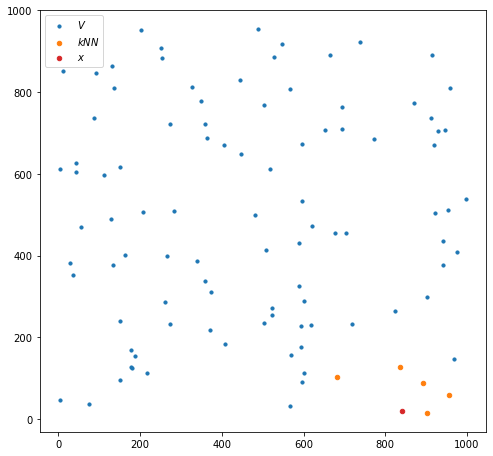

In [49]:
ax = mutils.visualizar_cercanos(x, V, C=cercanos,
                                ax=None, figsize=(8,8), s=10,
                                norm=norm, k=2)

### Test

In [50]:
# ============================================================
# PRUEBAS AVANZADAS ==========================================
# ============================================================

mutils.correr_prueba_k_mas_cercanos(k_mas_cercanos)

__________________________________
Verificando errores...


test_k_mas_cercanos


Sin Errores
__________________________________


## Vecinos Cercanos 

En un  Estudio de Stanford  [stanfordchildrens.org/es/topic/default?id=normalgrowth-90-P04728] respecto al crecimiento normal de las personas en la adolescencia se calculo la altura y peso de una gran cantidad de hombres y mujeres en etapa de desarrollo en distintas edades. Usted, para un estudio personal pidio acceso a una parte de los datos utilizados para realizar este estudio. Sin embargo, por circunstancias de la vida, usted perdio definitivamente la información de edad de un grupo de estos datos. Adicionalmente, cada uno de estos datos va acompañado de un indicador que los investigadores dicen podría ser importante para los estudios que usted va a realizar.

Para evitar tener que pedir los datos de nuevo usted decide hacer interpolación de datos prediciendo la etiqueta de edad de los datos que le faltan. Para esto usted utilizará el método de Vecinos mas cercanos o KNN. Como aún no es claro como utilizar las etiquetas de Sexo para este fin, usted decide utilizar únicamente las 3 columnas que contienen información númerica. También nota, que en el grupo de datos solo hay 2 edades distintas, por lo que puede tratar este valor númerico como una etiqueta cualitativa y realizar clasificación entre 2 clases utilizando la moda de los vecinos mas cercanos.

Entonces usted se propone el siguiente plan de acción:


1.   Realizar una función que encuentre el indice de los $k$ vectores más cercanos a un vector $\mathbf{x}$ en una lista de vectores $V$
2.   Realizar una función que encuentre la etiqueta de un vector $x$ utilizando KNN a partir de una base de datos de vectores etiquetados.
3.   Realizar una función que encuentre las etiquetas de todos los elementos faltantes.


### Datos

A continuación se cargan los datos a utilizar en esta sección.

In [51]:
datos_conocidos, datos_desconocidos = mutils.DATOS_KNN

print('Datos Conocidos:')
display(datos_conocidos[:5])

print('\n__________________________________\n')
print('Datos Desconocidos:')
display(datos_desconocidos[:5])

Datos Conocidos:


,Genero,Edad,Altura,Peso,Indicador
0,Mujer,14,152.0,55.8,16.932
1,Mujer,14,159.9,49.6,16.538
2,Hombre,14,165.1,54.3,17.508
3,Mujer,14,161.2,68.7,19.290
4,Hombre,12,145.0,24.0,12.060



__________________________________

Datos Desconocidos:


,Genero,Edad,Altura,Peso,Indicador
0,Mujer,None,161.9,60.1,18.128
1,Mujer,None,190.8,40.5,17.118
2,Mujer,None,183.9,66.8,20.386
3,Mujer,None,162.6,29.8,13.928
4,Hombre,None,157.5,66.4,18.746


### Encontrar Indice de cercanos

Realice una función que encuentre el indice de los $k$ vectores más cercanos a un vector $\mathbf{x}$ en una lista de vectores $V=\{\mathbf{v_i} \}_{i=1}^m$

In [63]:
def k_mas_cercanos_indice(x, V, k=1, norm=norm):
    """
    Encuentra indice de vecinos cercanos
    ___________________________________
    Entrada:
    x: [1D-array] Vector central
    V: [2D-array] Familia de vectores 
    k: [int] # de vectores cercanos
    norm: [function] función de norma a utilizar
    ___________________________________
    Salida:
    idx: [list] indice sobre V de los k vectores cercanos.
    """


    # =====================================================
    # COMPLETAR ===========================================
    # -
    # AYUDA:
    # Distancia de x con el primer elemento de V
    distancias = [norm(x - v) for v in V]
    # Enumera las distancias y los índices correspondientes, luego ordénalos por distancia
    distancias_y_indices = list(enumerate(distancias, 0))
    distancias_y_indices.sort(key=lambda d: d[1])
    
    # Obtiene los índices de los 'k' vectores más cercanos
    
    
    # Estructura de salida
    idx = [i for i, _ in distancias_y_indices[:k]]
    #idx = list(range(k))
    # =====================================================
    
    return idx

#### Probar - Test

In [64]:
# PROBAR ==========================================================
V, x =  generar_datos(n=10, dim=2, nlog=3, seed=None)

# Encontrar cercanos
idx = k_mas_cercanos_indice(x, V, k=5,
                            norm=norm)
print(idx)

[6, 0, 7, 5, 9]


In [65]:
# ============================================================
# PRUEBAS AVANZADAS ==========================================
# ============================================================

mutils.correr_prueba_k_mas_cercanos_indice(k_mas_cercanos_indice)

__________________________________
Verificando errores...




Sin Errores
__________________________________


### Encontrar Etiqueta

Ahora, utilizando la función anterior complete la función $\texttt{encontrar_etiqueta}$(). Esta función encuentra la etiqueta de un vector $x$ utilizando KNN a partir de una base de datos de vectores etiquetados, como la presentada en la sección de Datos

In [66]:
# Guardamos las columnas de la base de datos en constantes.
# Genero | Edad | Altura | Peso | Indicador
GEN,       EDA ,  ALT,     PES,   IND   = list(datos_conocidos.columns)

In [82]:
def encontrar_etiqueta(d, datos, k=5, etiqueta=EDA):
    """
    Encuentra etiqueta de un dato usando KNN a partir de una base de datos
    ___________________________________
    Entrada:
    d:     [pandas.Series] dato desconocido (Fila de DataFrame)
    datos: [pandas.DataFrame] base de datos conocida (DataFrame)
    k:     [int] número de vecinos a tener en cuenta
    etiqueta: [GEN/EDA] etiqueta a predecir (Genero/Edad)
    ___________________________________
    Salida:
    label:  [str] etiqueta del dato d
    kinfo: [array] lista de etiquetas de los k-datos mas cercanos
    """
    global GEN, EDA, ALT, PES, IND 
    # Identifica vectores de datos y etiquetas
    labels = datos[etiqueta]
    V = datos[[ALT,PES,IND]]

    # Identifica vector del dato
    x = d[[ALT,PES,IND]]

    # Encuentra etiquetas mas cercanas
    idx = k_mas_cercanos_indice(x=x, V=np.array(V), k=k, norm=norm)
    klabels = labels[idx] 
    #print('klabels', klabels)
    kvecs = V.iloc[idx]

    # Guarda información de mas cercanos
    kinfo = kvecs.copy()
    kinfo['Etiquetas'] = np.array(klabels) 

    # =====================================================
    # COMPLETAR ===========================================
    # -
    # AYUDA:
    # Estructura de salida 
    label = label = kinfo['Etiquetas'].mode().iloc[0] ##labels.iloc[0]
    # =====================================================

    return label, kinfo

#### Probar - Test

In [83]:
# PROBAR ==========================================================
i = 0
datos = datos_conocidos
d = datos_desconocidos.iloc[i]

# Hallar etiquetas
et_eda, kinfo_eda = encontrar_etiqueta(d, datos, k=5, etiqueta=EDA)

# Mostrar resultados
print('________________________________________')
print(f'Edad   : {et_eda}')
print(f'Cercanos:')
display(kinfo_eda)

________________________________________
Edad   : 14
Cercanos:


,Altura,Peso,Indicador,Etiquetas
1030,161.5,60.2,18.118,14
1261,161.6,59.4,18.012,14
1313,160.6,60.0,18.036,12
286,163.1,60.7,18.284,14
951,161.6,61.7,18.334,14


In [84]:
# ============================================================
# PRUEBAS AVANZADAS ==========================================
# ============================================================

mutils.correr_prueba_encontrar_etiqueta(encontrar_etiqueta)

__________________________________
Verificando errores...







Sin Errores
__________________________________


### Encontrar todas las etiquetas

Finalmente, cree una función que le complete la información de la tabla $\texttt{datos_desconocidos}$

In [85]:
def completar_tabla(datos_conocidos, datos_desconocidos, k=5):
    """
    Realiza interpolación de datos de una base de datos con etiquetas desconocidas
    a partir de una base de datos con etiquetas conocida
    utilizando el método KNN con parámetro k
    ___________________________________
    Entrada:
    datos_conocidos:    [pandas.DataFrame] base de datos conocida
    datos_desconocidos: [pandas.DataFrame] base de datos desconocida 
    k:                  [int] número de vecinos a tener en cuenta
    ___________________________________
    Salida:
    datos_interpolados:  [pandas.DataFrame] base de datos desconocida interpolada
    """
    global GEN, EDA, ALT, PES, IND 

    # =====================================================
    # COMPLETAR ===========================================
    # -
    # AYUDA:
    # Copia de arreglo para modificar
    datos_interpolados = datos_desconocidos.copy(deep=True)
    # Iteración con progreso.
    list_estimations = []
    for i in tqdm(range(len(datos_desconocidos))):
        d = datos_desconocidos.iloc[i]
        et_eda, kinfo_eda = encontrar_etiqueta(d, datos, k=5, etiqueta=EDA)
        list_estimations.append(et_eda)
    datos_interpolados['Edad'] = list_estimations
    
    
    return datos_interpolados

#### Probar - Test

In [86]:
# ============================================================
# PRUEBAS AVANZADAS ==========================================
# ============================================================

mutils.correr_prueba_completar_tabla(completar_tabla)

__________________________________
Verificando errores...



Generando tabla a partir de completar_tabla




Generando tabla de comparación





Sin Errores
__________________________________
